In [19]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
dt = pd.read_csv("haha.csv")
dt = dt.drop(columns=['ADV','NOUN','VERB','word_freq_rate_Nsw','Noun_rate','F_K_R','PRON', 'NOUN_Ratio' , 'PRP_Ratio' , 'TTR' ],axis=1)
dt.head()

,Dates,Year,PRP_NOUN_Ratio,word_freq_rate,verb_freq_rate,PRON_rate,ADV_rate,H_S,BM,SICH,A_R_I
0,1980717,1980,28.764045,4.235493,1.270648,4.320203,0.677679,28.961185,14.263374,12.992832,10
1,1980818,1980,39.957717,1.456855,0.747105,5.117669,0.000000,25.454191,15.407202,14.448052,9
2,1980921,1980,34.718499,4.569055,1.064382,5.399792,0.337487,22.607381,15.921747,17.662683,9
3,19801019,1980,31.208499,3.817799,0.763560,5.660874,0.342285,28.946711,14.788018,14.009112,8
4,19801028,1980,18.297332,5.404671,1.059207,2.878870,0.000000,30.511771,13.786073,14.001986,10


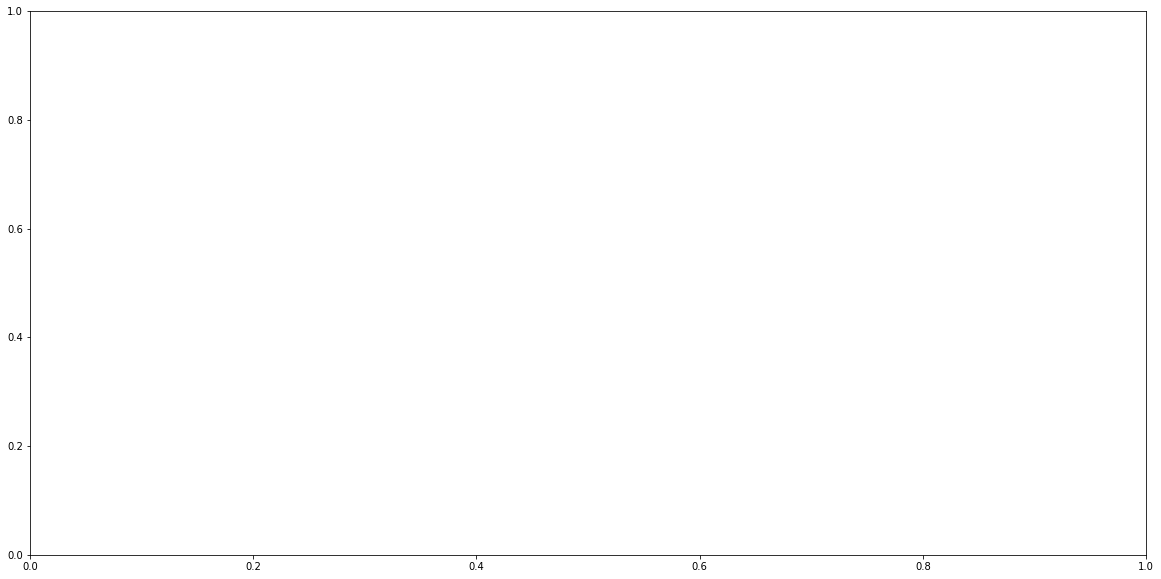

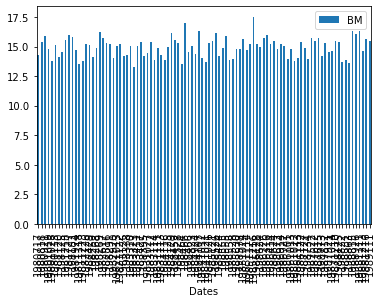

In [3]:
#plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20, 10))
dt.plot.bar(x = 'Dates', y = 'BM')
plt.show()

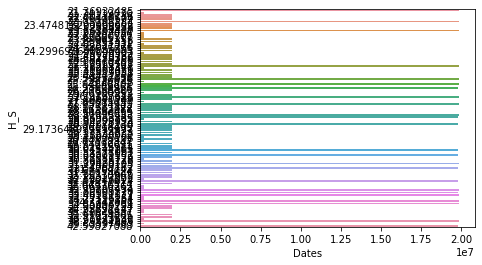

In [4]:
sns.barplot(dt.Dates, dt.H_S, orient='h')

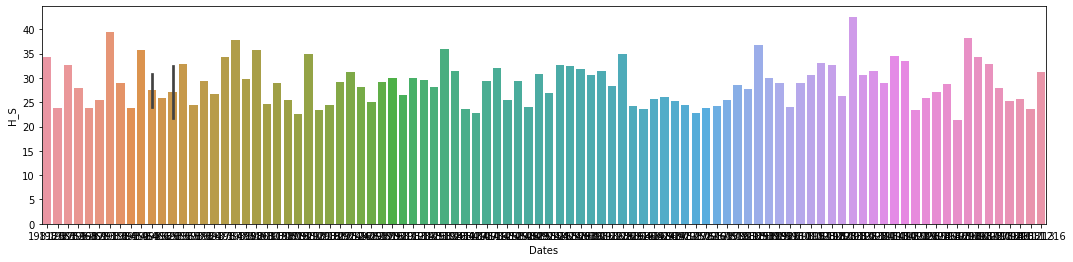

In [5]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Dates', y='H_S', data=dt)

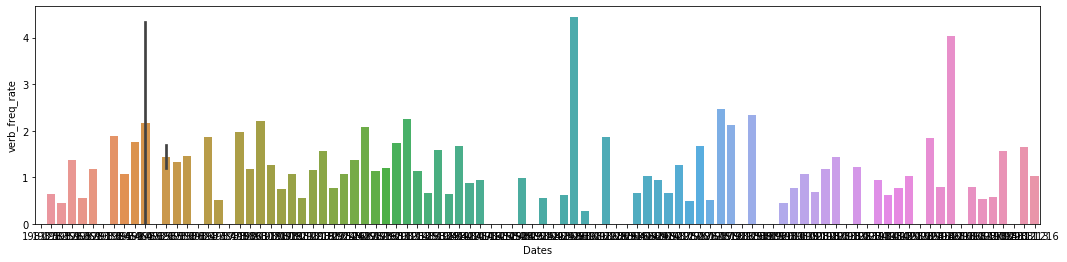

In [6]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Dates', y='verb_freq_rate', data=dt)

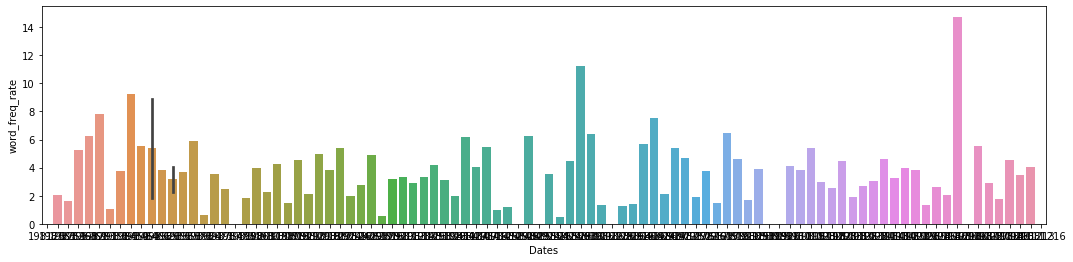

In [7]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Dates', y='word_freq_rate', data=dt)

Text(0.5, 1.0, 'Dates and ADV rate')

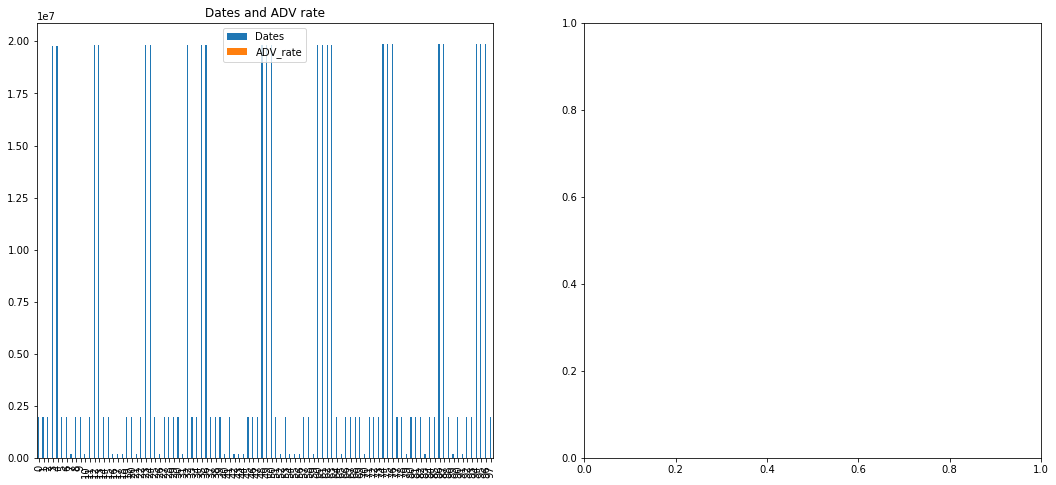

In [8]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
dt[['Dates','ADV_rate']].plot.bar(ax=ax[0])
ax[0].set_title('Dates and ADV rate')

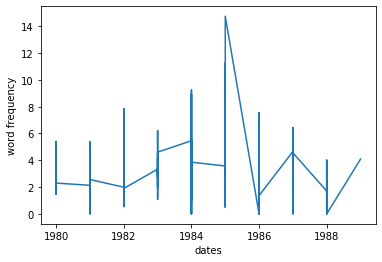

In [9]:
freq = dt['word_freq_rate']
date = dt['Year']
plt.plot(date,freq)

plt.xlabel("dates")
plt.ylabel("word frequency")
plt.show()

In [13]:
from sklearn.svm import OneClassSVM
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#### 异常检测 ### 
# 创建异常检测模型
one_svm = OneClassSVM(nu=0.1, kernel='rbf', random_state=2018)
# 训练模型
one_svm.fit(dt)
# 预测异常数据
pre_test_outliers = one_svm.predict(dt)

### 异常结果统计###
# 合并测试检测结果
total_test_data = np.hstack((dt, pre_test_outliers.reshape(-1,1)))

# 获取正常数据
normal_test_data = total_test_data[total_test_data[:, -1] == 1]
# 获取异常数据
outlier_test_data = total_test_data[total_test_data[:, -1] == -1]

print('Anomaly detection is：{}/{}'.format(len(outlier_test_data), len(total_test_data)))

py.iplot([go.Scatter3d(x=total_test_data[:,0], y=total_test_data[:,7], z =total_test_data[:,8], 
                       mode='markers',marker=dict(color=total_test_data[:, -1], size=5))])



/Users/luofan/anaconda3/lib/python3.7/site-packages/sklearn/svm/classes.py:1185: DeprecationWarning:

The random_state parameter is deprecated and will be removed in version 0.22.



Anomaly detection is：32/98


In [17]:
outlier_test_data[1]

array([ 1.98192400e+06,  1.98100000e+03,  3.10000000e+01,  5.37463595e+00,
        7.67805136e-01,  4.42149854e+00,  3.44188509e-01,  2.91757287e+01,
        1.47314823e+01,  1.23582766e+01,  8.00000000e+00, -1.00000000e+00])